# Ensemble

<br>
<div>
  <ul>
   <p style="font-weight:bold">여러 머신러닝 모델을 연결하여 더 강력한 모델 생성</p>
  <p>단일모델보다 일반화 된 결과 도출 및 높은 성능</p>
   <p style="">Bagging / Boosting / Stacking 의 방법이 존재</p>
  </ul>
</div>
<br>
<span style="font-size:17px">Bagging ( Bootstrap Aggregating ) </span>
<div>
  <ul>
      <p>데이터를 복원 추출하여 여러개의 표본을 생성한 후, 다른 데이터로 각 모델을 개발하고 결과들을 합쳐 하나의 결과를 생성</p>
      <p>명목형 변수는 voting / 연속형 변수는 평균 을 사용하여 결과 생성</p>
      <p>각각의 단일 모델은 독립적으로 학습하기 때문에 병렬적 학습이 가능 -> <span style="color:red">속도가 빠르고 일반화 성능이 좋음</span></p>
      <p>가장 대표적인 모델은 <span style="color:blue">RandomForest</span></p>
  </ul>
</div>

<br>
<span style="font-size:17px">Boosting</span>
<div>
  <ul>
      <p>틀린 타겟에 가중치를 부여하여 모델 생성</p>
      <p>복원 추출을 하지만, 특정 데이터에 가중치를 주어 틀린 문제가 샘플링 될 확률 높임</p>
      <p>각 모델이 의존적임 ( 전의 모델의 틀린 타겟에 가중치를 주어야하기 때문 ) </p>
      <p>이상치에 취약</p>
      <p>직렬적으로 학습하기 때문에 속도가 느리지만 배깅보다 <span style="color:red">성능이 높음</span> ( xgboost 이후로 병렬적 학습 가능 )</p>
      <p>결과 도출시 성능이 좋은 tree일수록 가중치를 주어 결과를 도출 ( 과적의 위험이 존재 )
      <p>가장 대표적인 모델은 <span style="color:blue">GBM, XGBOOST, AdaBoost, LGBM ..</span></p>
  </ul>
</div>

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
# 패키지 없을 수도 있음
import mglearn
# 시각화
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
# 경고 지우기
import warnings
warnings.filterwarnings(action='ignore')
# import data
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
# metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

### RandomForest ( Bagging )
<br>
<div>
  <ul>
      <p>여러 개의 DT를 생성하고 평균/투표를 통해 결과 도출</p>
      <p>명목형 변수는 voting / 연속형 변수는 평균 을 사용하여 결과 생성</p>
      <p>DT의 과대적합을 피할 수 있는 방법으로 조금씩 다른 결정트리의 묶음</p>
  </ul>
</div>

<span style="font-weight:bold">구축 과정</span>
```
1. 생성할 트리의 개수 정하기 ( n_estimators를 통해 )
2. 부트스트랩 샘플 생성( 랜덤 샘플링 = 복원 추출 )
3. max_featrue 제한 ( 각 트리마다 features 수를 제한 / 너무 크면 트리 유사성이 커지고 낮으면 깊이가 깊어짐 )
```

<span style="color:red">장점</span>
```
1. 튜닝을 많이 하지 않아도 높은 성능 
2. 데이터의 스케일을 맞출 필요가 없음
3. 일반화 성능이 좋음
```

<span style="color:blue">단점</span>
```
1. random_state값을 고정하지 않으면 결과값이 크게 변동 
2. 차원이 크고 희소한 데이터는 성능이 좋지 않음 ( ex. text )
3. 메모리 소모가 크고 시간이 오래걸림
4. 개별 트리의 분석이 어려움
```

In [37]:
# RandomForest 분류
# random_state 꼭 고정하기
from sklearn.ensemble import RandomForestClassifier

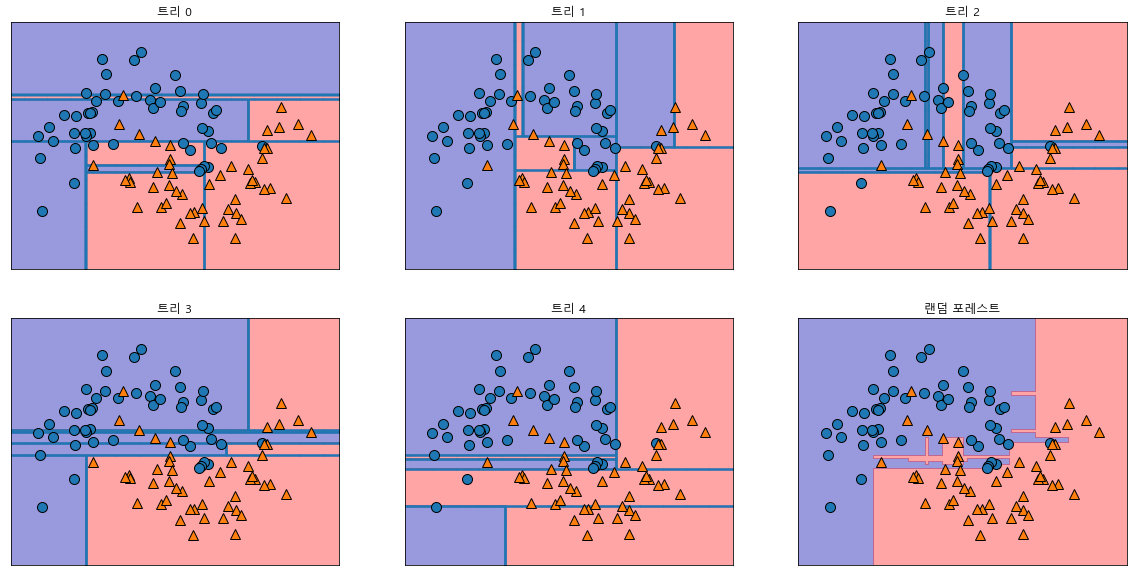

In [38]:
# 달 예제
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

# 각 트리의 속성은 estimators_에 저장
# 아래 그림을 보면 다섯 개의 결정 경계는 다름
# 훈련 셋이 다르기때문에 불완전

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('랜덤 포레스트')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

In [39]:
# 암 예제
# randomforest의 score는 정확도
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도 : 0.995
테스트 세트 정확도 : 0.944


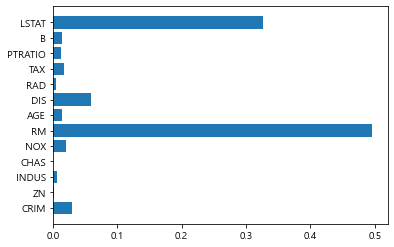

In [40]:
# RandomForest 회귀
from sklearn.ensemble import RandomForestRegressor

boston = load_boston()
X = boston.data 
y = boston.target
colnames = boston.feature_names # 13개 칼럼 이름 가져올때

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = RandomForestRegressor(n_estimators=400, min_samples_split=3)
model.fit(X = x_train, y = y_train)
# feature importance 확인
imp = model.feature_importances_

plt.barh(range(13), imp) 
plt.yticks(range(13), colnames)
plt.show()

In [41]:
# 모델 평가
y_pred = model.predict(X)
y_true = y

mse = mean_squared_error(y_true, y_pred)
print('mse=', mse)

mse= 5.156717195295044


### GradientBoosting ( Boosting )
<br>
<div>
  <ul>
      <p>순차적으로 학습기를 만들며, 이전 모델의 잔차를 보완하는 방식</p>
      <p>얕은 트리들을 많이 연결</p>
      <p>가중치를 업데이트할때 경사하강법을 사용</p>
  </ul>
</div>

<span style="color:red">장점</span>
```
1. 과적합에도 강한 뛰어난 예측 성능을 가진 알고리즘
```

<span style="color:blue">단점</span>
```
1. 수행시간이 오래걸림
```

<span style="color:red; text-weight:bold">보통 max_depth를 5이하로 설정</span>

In [42]:
# GradientBoosting 분류
# randomforest의 score는 정확도
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(n_estimators=100, random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965


In [43]:
# 위 모델의 과적을 막기 위한 두가지 방법
# 1. 트리의 최대 깊이 줄이기
gbrt = GradientBoostingClassifier(n_estimators=100, random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

# 트리의 학습률 낮추기
gbrt = GradientBoostingClassifier(n_estimators=100, random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.972
훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.965


In [44]:
# GradientBoosting 회귀
from sklearn.ensemble import GradientBoostingRegressor

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=13)
reg = GradientBoostingRegressor(n_estimators=100, max_depth=4, random_state=13)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print('mse =', mse)

mse = 3383.2913803628476


### AdaBoost ( Boosting )
<br>
<div>
  <ul>
      <p>순차적으로 학습기를 만들며, 이전 모델의 오분류한 샘플의 가중치를 adaptive하게 바꾸며 오분류에 집중</p>
      <p>최종 모델은 개별 모델에 각 가중치를 적용하고 조합하여 추출</p>
      <p>구분이 어려운 타겟들에 가중치를 부여</p>
      <p>base_estimator로 기본 모델 변경가능 ( default : classifier => DT(max_depth=1) / regressor => DT( max_depth=3) )</p>
  </ul>
</div>

<span style="color:red">장점</span>
```
1. 구현이 쉬움
2. 과적합이 되는 경향을 줄일 수 있음
3. 개별 모델의 실수를 반복적으로 수정하고 반영하기 때문에 정확도가 높아짐
```

<span style="color:blue">단점</span>
```
1. 노이즈데이터와 이상치에 민감
```

In [45]:
# AdaBoost 분류
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(ada.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(ada.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.986


In [46]:
# AdaBoost 회귀
from sklearn.ensemble import AdaBoostRegressor

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=13)
ada = AdaBoostRegressor(n_estimators=100, random_state=13)
ada.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print('mse =', mse)

mse = 3383.2913803628476


### XGBoost ( Boosting )
<br>
<div>
  <ul>
      <p>Extreme Gradient Boosting의 약자</p>
      <p>boosting알고리즘을 병렬 학습이 가능하게 한 모델</p>
      <p>성능과 자원 효율이 좋음</p>
  </ul>
</div>

<span style="color:red">장점</span>
```
1. GBM 대비 빠른 수행시간
2. 모델 자체에 과적합 규제 기능
3. Early Stopping(조기 종료) 기능이 있음
```

<span style="color:blue">단점</span>
```
1. Tree base model이기 때문에 훈련 데이터 외의 데이터는 예측이 어려움
```

In [47]:
# xgboost 분류
# score -> error 
# early_stopping_rounds 는 평가 지표가 감소하지 않는 최대 반복 횟수 -> 조기종료 기능
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(xgb.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(xgb.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.986


In [59]:
# xgboost 회귀
# score -> rmse
from xgboost import XGBRegressor

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target ,test_size=0.1)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7)

xgb_model.fit(X_train,y_train)
predictions = xgb_model.predict(X_test)
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
print(explained_variance_score(predictions,y_test))

### Light Gradient Boost ( Boosting )
<br>
<div>
  <ul>
      <p>leaf-wise 트리 분할을 사용하여 속도가 빠름</p>
      <p>큰 사이즈의 데이터도 가능</p>
      <p>작은 메모리 차지</p>
  </ul>
</div>

<span style="color:red">장점</span>
```
1. 대용량의 데이터 처리
2. 빠른 속도 및 효율적 메모리 사용
```

<span style="color:blue">단점</span>
```
1. leaf-wise 트리 분할로 과적합의 우려가 높음 -> 데이터의 양이 적을 때는 자제
```

In [50]:
# lgbm 분류
from lightgbm import LGBMClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

lgbm = LGBMClassifier(n_estimators=100, random_state=42)
lgbm.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(lgbm.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(lgbm.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


In [53]:
# lgbm 회귀
from lightgbm import LGBMRegressor

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target ,test_size=0.1)
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.08, subsample=0.75,colsample_bytree=1, max_depth=7)

lgbm.fit(X_train,y_train)
predictions = lgbm.predict(X_test)
r_sq = lgbm.score(X_train, y_train)
print(r_sq)

0.9676274182599354


### CatBoost ( Boosting )
<br>
<div>
  <ul>
      <p>one-hot encoding/ label encoding을 하지 않아도 범주형 변수 처리가 가능 -> 자체적으로 ordered target encoding 진행</p>
      <p>train set의 row를 랜덤으로 섞는 random permutation 진행 -> 과적합 방지</p>
      <p>낮은 cardinality를 가지는 범주형 변수는 one-hot encoding시행 -> one_hot_max_size로 파라미터 설정 가능
  </ul>
</div>

<span style="color:red">장점</span>
```
1. 범주형 변수를 자동으로 전처리
2. 변수의 튜닝 없이도 높은 예측성능
```

<span style="color:blue">단점</span>
```
1. 데이터 대부분이 수치형인 경우 lgbm보다 느림
2. 희소한 데이터의 경우 처리에 어려움
```

In [ ]:
# catboost 분류
from catboost import CatBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

cat = CatBoostClassifier(n_estimators=100, random_state=42)
cat.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(cat.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(cat.score(X_test, y_test)))

In [ ]:
# catboost 회귀
from catboost import CatBoostRegressor

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target ,test_size=0.1)
cat = CatBoostRegressor(n_estimators=100, random_state=7)

cat.fit(X_train,y_train)
predictions = cat.predict(X_test)
r_sq = cat.score(X_train, y_train)
print(r_sq)